# Problemas das N-Rainhas

**Professor:**
Cristiano Leite de Castro

**Alunos:**
Gabriel Camatta Zanotelli	2018020140
Lucas de Almeida Martins	2018020328

## Introdução

O problema proposto neste trabalho consiste no desenvolvimento de um algoritmo com base em computação evolucionária, que promova a disposição de N rainhas em um tabuleiro de xadrez de tamanho também N, de forma que a quantidade de xeques entre as rainhas seja o menor possível.


## Implementação

O código foi desenvolvido na linguagem python e o problema foi modelado de como uma permutação de números inteiros de N elementos, de forma que cada posição da permutação representa uma coluna do tabuleiro e o valor de cada posição representa a linha da respectiva rainha na coluna. Essa representação foi escolhida, pois ela gera uma população inicial sem a possibilidade de rainhas sofrerem xeques na horizontal e na vertical.
Além disso, serão analisadas a seguir a implementação de cada parte do código em sua ordem de execução.


### Definições de variáveis iniciais

In [ ]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
crossover_rate = 1
mutation_rate = 0.8

base_population = 20
pop_sample = 5

fitness_history = []


### Funções de suporte

In [ ]:
def argsort(seq):
    return sorted(range(len(seq)), key=seq.__getitem__)

def verify_condition(pupulation):
    return 0 in pupulation

def get_best_solution(population_fit):
    count = 0
    aux = 100
    for i in range(len(population_fit)):
        if population_fit[i] < aux:
            aux = population_fit[i]
            count = i
    return i

def draw_pop(pop):
    for i in range(len(pop)):
        line = ''.format((8-i), ' ')
        for j in range(len(pop)):
            if pop[j] == i:
                line = line + "X "
            else:
                line = line + "- "
        print(line)

### Definição da População Inicial

Utilizamos uma função específica que recebe dois argumentos, a população de cada geração e o tamanho N do tabuleiro (que consequentemente é a quantidade de rainhas). Os parâmetros podem ser passados como argumentos ou a função pode ser chamada utilizando valores padrão.

A função utiliza da biblioteca de random do Python e retorna um vetor vetor de vetores, em que cada campo é uma solução possível do resultado. É utilizado um método específico da biblioteca de forma que nenhuma rainha esteja na mesma linha na geração inicial, já minimizando ao máximo o número de cheques.

In [ ]:
def init_population(_mu:int = 20, n:int = 8):
    population = []
    for i in range (_mu):
        population.append(rd.sample(range(n), n))
    return population

### Avaliação de candidatos

Utilizamos de um método já bem difundido de análise de matrizes para checar cada tabuleiro individualmente, retornando um inteiro que representa o número de cheques no tabuleiro. Vale notar que o número será sempre par, uma vez que uma rainha que coloca outra em cheque, ficará, consequentemente, em cheque também.

In [ ]:
def fitness_nq(solution):
    xeques = 0
    for i in range(0,len(solution)):
        for j in range(0,len(solution)):
            if i!=j:
                if i-solution[i] == j-solution[j] or i+solution[i] == j+solution[j]:
                    xeques+=1
    return xeques

## Seleciona pais

Para a seleção dos pais passamos uma população inteira, assim como uma “amostra de população”, no caso dos testes feitos, o valor utilizado foi 5.

Um número de soluções aleatórias igual ao tamanho da amostra são selecionadas e avaliadas. Os dois mais bem adaptados serão os utilizados para recombinação.


In [ ]:
def select_parents(pupulation, pop_sample):

    sample_pop = rd.sample(pupulation, pop_sample)

    sample_pop_fit = [0] * pop_sample
    for i in range(len(sample_pop_fit)):
        sample_pop_fit[i] = fitness_nq(sample_pop[i])

    parents_id = np.argsort(sample_pop_fit)[:2]
    parents = [sample_pop[parents_id[0]],
               sample_pop[parents_id[1]]]
    return parents

## Recombinação dos pais

Os dois pais selecionados na função anterior são passados, juntamente com a dimensão N do tabuleiro. É então utilizado um método chamado de “Cut and crossover”, onde ambos os pais são “cortados” em um ponto aleatório e recombinados, com o Filho 1 sendo formado pela primeira metade do Pai 1 e a segunda metade do Pai 2, e o Filho 2 com a primeira metade do Pai 2 e a primeira metade do Pai 1.

Essa recombinação é feita com uma probabilidade de 100%, como recomendado no guia do trabalho.


In [ ]:
def cut_and_crossfill(N, parents):
    cross_point = rd.randint(1, N-1)

    p1 = [parents[0][:cross_point] , parents[0][cross_point:]]
    p2 = [parents[1][:cross_point] , parents[1][cross_point:]]

    f1 = p1[0]
    f2 = p2[0]
    for i in range(len(parents[1])):
        if not f1.__contains__(i):
            f1.append(i)
        if not f2.__contains__(i):
            f2.append(i)

    return [f1, f2]

## Mutação dos filhos

Os filhos são posteriormente mutados por uma função que receberá as duas soluções geradas pela função anterior, uma “taxa de mutação” e o valor N. Com uma probabilidade igual a taxa de mutação passada, dois campos aleatórios do vetor de cada solução serão invertidos. O resultado final é retornado pela função.

Os valores empregados foram recomendados no guia do trabalho.


In [ ]:
def mutate_offspring(offspring, mutation_rate, N):
    for of in offspring:
        if rd.random() < mutation_rate:
            id1 = rd.randint(0, N-1)
            id2 = rd.randint(0, N-1)
            aux = of[id1]
            of[id1] = of[id2]
            of[id2] = aux
    return offspring

## Cria e seleciona nova geração

A geração atual, juntamente com os filhos gerados, num total de “tamanho da população” + 2, são passados e analisados. São então selecionadas uma quantidade de soluções igual ao tamanho da população, descartando duas, formando a nova geração.

In [ ]:
def select_new_generation(poulation, offspring):
    new_generation = poulation + offspring

    new_pop_fit = [0] * len(new_generation)
    for i in range(len(new_generation)):
        new_pop_fit[i] = fitness_nq(new_generation[i])

    new_pop_id = argsort(new_pop_fit)[:base_population]

    next_generation = []
    for i in range(len(new_generation)):
        if i in new_pop_id:
            next_generation.append(new_generation[i])

    return next_generation

## Desenha gráfico

Função de desenho do gráfico.

In [ ]:
def draw_graph(datax, datay):
    plt.plot(range(datax+1), datay[0], "-g", label="Medium")
    plt.plot(range(datax+1), datay[1], "-r", label="Best")
    plt.legend(loc="upper right")
    plt.xlabel('Generation')
    plt.ylabel('Fittness')
    plt.show()

## Execução

In [ ]:
N = 0
try:
    N = int(input())
except:
    raise ValueError('ERROR: o valor digitado não é valido!')

max_generation = 10 * N
print("Número de rainhas do problema: ", N)
print("Máximo de gerações: ", max_generation)
print()

pupulation = init_population(base_population, N)
population_fitt = [0] * base_population

for i in range(base_population):
    population_fitt[i] = fitness_nq(pupulation[i])
print("Fittness da população inicial:")
print(population_fitt)

count_gen = 0
datay = [[], []]
for i in range(max_generation):
    parents = select_parents(pupulation, pop_sample)

    offspring = cut_and_crossfill(N, parents)

    mutate_offspring(offspring, mutation_rate, N)

    pupulation = select_new_generation(pupulation, offspring)

    for j in range(base_population):
        population_fitt[j] = fitness_nq(pupulation[j])

    datay[0].append(sum(population_fitt) / len(population_fitt))
    datay[1].append(min(population_fitt))

    count_gen = i
    if verify_condition(population_fitt):
        break

print()
print("Geração final: ", (count_gen+1))
print()
print("Fittness da população final:")
print(population_fitt)
print()
print("Melhor indivíduo:")
best_pop = pupulation[get_best_solution(population_fitt)]
print(best_pop)
print()
draw_pop(best_pop)

draw_graph(count_gen, datay)

## Resultados

O programa possui dois critérios de parada, qualquer critério que for atendido interrompe a execução do software. O primeiro critério é encontrar uma solução em que o número de cheques é igual a 0 e o segundo critério é parar caso o número de iterações seja maior ou igual a 10 x N.

Além disso, serão analisados o fitness médio da população por quantidade de iterações e o fitness do melhor indivíduo por quantidade de iterações.

### N = 8
Com o valor de N = 8, atingiu-se o primeiro critério de parada em 35 iterações.


### N = 20
Com o valor de N = 20, atingiu-se o segundo critério de parada com 200 iterações, tanto a média quanto o melhor indivíduo apresentavam uma quantidade de 2 cheques.


### N = 50
Com o valor de N = 50, atingiu-se o segundo critério de parada com 500 iterações, tanto a média quanto o melhor indivíduo apresentavam uma quantidade de 6 cheques.

## Conclusão

Com N = 20 e N = 50 as curvas, depois de 125 e 220 iterações, respectivamente, não apresentaram melhorias, provavelmente porque o programa não apresentou variabilidade suficiente e a configuração final da população é resultado de um pico evolutivo que apresentava soluções melhores no início, mas encontrou uma limitação.

Dessa forma, pôde-se notar a importância de adicionar variabilidade às populações, tanto na forma de mutações mais frequentes, quanto reduzindo a exclusão dos indivíduos menos inaptos, para que o algoritmo consiga chegar na resposta ótima e não fique preso em uma tendência evolutiva.


Número de rainhas do problema:  50
Máximo de gerações:  500

Fittness da população inicial:
[58, 74, 80, 56, 62, 66, 62, 76, 56, 80, 70, 64, 60, 70, 74, 80, 56, 58, 62, 70]

Geração final:  500

Fittness da população final:
[20, 20, 20, 18, 16, 18, 18, 18, 18, 18, 18, 18, 18, 18, 14, 18, 16, 12, 18, 14]

Melhor indivíduo:
[39, 28, 24, 3, 42, 13, 20, 8, 1, 10, 46, 31, 19, 44, 26, 36, 21, 6, 23, 43, 38, 49, 17, 40, 30, 35, 4, 11, 47, 5, 22, 33, 0, 2, 37, 16, 9, 7, 12, 14, 15, 18, 27, 25, 29, 32, 34, 41, 45, 48]

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - X - - - - - - - - - - - - - - - - - 
- - - - - - - - X - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - X - - - - - - - - - - - - - - - - 
- - - X - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
- - - - - - - - - - - - - - - - - - - - - - - - - - X - - - - - - - - - - - - - 

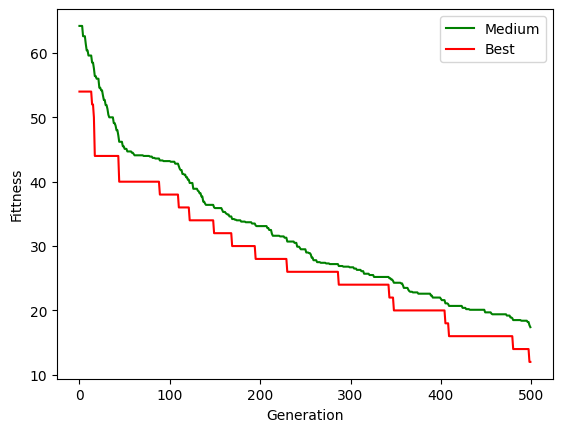

In [155]:
N = 0
try:
    N = int(input())
except:
    raise ValueError('ERROR: o valor digitado não é valido!')

max_generation = 10 * N
print("Número de rainhas do problema: ", N)
print("Máximo de gerações: ", max_generation)
print()

pupulation = init_population(base_population, N)
population_fitt = [0] * base_population

for i in range(base_population):
    population_fitt[i] = fitness_nq(pupulation[i])
print("Fittness da população inicial:")
print(population_fitt)

count_gen = 0
datay = [[], []]
for i in range(max_generation):
    parents = select_parents(pupulation, pop_sample)

    offspring = cut_and_crossfill(N, parents)

    mutate_offspring(offspring, mutation_rate, N)

    pupulation = select_new_generation(pupulation, offspring)

    for j in range(base_population):
        population_fitt[j] = fitness_nq(pupulation[j])

    datay[0].append(sum(population_fitt) / len(population_fitt))
    datay[1].append(min(population_fitt))

    count_gen = i
    if verify_condition(population_fitt):
        break

print()
print("Geração final: ", (count_gen+1))
print()
print("Fittness da população final:")
print(population_fitt)
print()
print("Melhor indivíduo:")
best_pop = pupulation[get_best_solution(population_fitt)]
print(best_pop)
print()
draw_pop(best_pop)

draw_graph(count_gen, datay)

## Resultados

O programa possui dois critérios de parada, qualquer critério que for atendido interrompe a execução do software. O primeiro critério é encontrar uma solução em que o número de cheques é igual a 0 e o segundo critério é parar caso o número de iterações seja maior ou igual a 10 x N.

Além disso, serão analisados o fitness médio da população por quantidade de iterações e o fitness do melhor indivíduo por quantidade de iterações.

### N = 8
Com o valor de N = 8, atingiu-se o primeiro critério de parada em 35 iterações.


### N = 20
Com o valor de N = 20, atingiu-se o segundo critério de parada com 200 iterações, tanto a média quanto o melhor indivíduo apresentavam uma quantidade de 2 cheques.


### N = 50
Com o valor de N = 50, atingiu-se o segundo critério de parada com 500 iterações, tanto a média quanto o melhor indivíduo apresentavam uma quantidade de 6 cheques.

## Conclusão

Com N = 20 e N = 50 as curvas, depois de 125 e 220 iterações, respectivamente, não apresentaram melhorias, provavelmente porque o programa não apresentou variabilidade suficiente e a configuração final da população é resultado de um pico evolutivo que apresentava soluções melhores no início, mas encontrou uma limitação.

Dessa forma, pôde-se notar a importância de adicionar variabilidade às populações, tanto na forma de mutações mais frequentes, quanto reduzindo a exclusão dos indivíduos menos inaptos, para que o algoritmo consiga chegar na resposta ótima e não fique preso em uma tendência evolutiva.
